# [教學目標]
以下程式碼將示範如何繪製特定特徵與目標值之間的散佈圖, 更直覺地看出特徵與目標的關係

繪製前需要觀察資料, 將異常值排除, 並且轉換成適合的數值單位輔助觀察

好的圖可以讓你更快認識資料, 繪圖畫的好也是一種藝術

# [範例重點]
直接列出的觀察方式 (In[3], Out[3])

出現異常數值的資料調整方式 (In[4])

散佈圖異常與其調整方式 (Out[5], In[6], Out[6])

In [9]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dir_path = 'C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/'

In [12]:
f_app = os.path.join(dir_path ,'application_train.csv')
print(f'Path of read in data :{f_app}')
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data :C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
app_train['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [14]:
# 由於其他天數都是負值, 且聘僱日數不太可能是 365243 (大約 1000年), 算是異常數字 
# 因此我們推斷這份資料中, DAYS_EMPLOYED 的欄位如果是 365243, 應該是對應到空缺值, 繪圖時應該予以忽略
sub_df = app_train[app_train['DAYS_EMPLOYED'] != 365243]

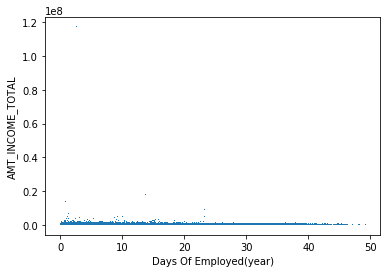

Correlation is 0.0130


In [24]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(sub_df['DAYS_EMPLOYED']/(-365),sub_df['AMT_INCOME_TOTAL'],',')
plt.xlabel('Days Of Employed(year)')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

corr = np.corrcoef(sub_df['DAYS_EMPLOYED']/(-365),sub_df['AMT_INCOME_TOTAL'])
print('Correlation is %.4f' % corr[1][0])

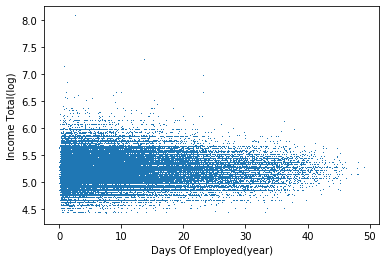

Correlation is 0.0380


In [26]:
# 通常可以對數值範圍較大的取 log: 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(sub_df['DAYS_EMPLOYED']/(-365),np.log10(sub_df['AMT_INCOME_TOTAL']),',')
plt.xlabel('Days Of Employed(year)')
plt.ylabel('Income Total(log)')
plt.show()

corr = np.corrcoef(sub_df['DAYS_EMPLOYED']/(-365),np.log10(sub_df['AMT_INCOME_TOTAL']))
print('Correlation is %.4f' %corr[1][0])

# [作業目標]

請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果

思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)

思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]

綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [27]:
app_train.shape

(307511, 122)

In [42]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtypes == 'object':
        if len(app_train[col].unique()) <= 2:
            app_train[col] = le.fit_transform(app_train[col])
            
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] ==  365243
app_train['DAYS_EMPLOYED'].replace(365243,np.nan,inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [61]:
# 觀察相關係數
print(app_train.corr()['TARGET'])

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM                 NaN
Name: TARGET, Length: 110, dtype: float64


# 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息

最好的方式當然是畫圖，舉例來說，我們知道 EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3 為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [74]:
#1
cor_target = app_train.corr()['TARGET'].sort_values(ascending = False)

In [81]:
#2
cor_income = app_train.corr()['AMT_INCOME_TOTAL'].sort_values(ascending = False)
cor_cre = app_train.corr()['AMT_CREDIT'].sort_values(ascending = False)

In [85]:
cre_hd = cor_cre.head(15)
cre_tl = cor_cre.tail(15)
print(cre_hd)
print('-'*300)
print(cre_tl)

AMT_CREDIT                    1.000000
AMT_GOODS_PRICE               0.986968
AMT_ANNUITY                   0.770138
EXT_SOURCE_1                  0.168429
AMT_INCOME_TOTAL              0.156870
EXT_SOURCE_2                  0.131228
FLAG_OWN_CAR                  0.116225
FLOORSMAX_AVG                 0.103296
FLOORSMAX_MEDI                0.102770
FLOORSMAX_MODE                0.100418
REGION_POPULATION_RELATIVE    0.099738
FLAG_DOCUMENT_3               0.096365
FLAG_DOCUMENT_8               0.082819
ELEVATORS_AVG                 0.080635
ELEVATORS_MEDI                0.079094
Name: AMT_CREDIT, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE               -0.021085
DEF_30_CNT_SOCIAL_CIRCLE      -0.021229
D

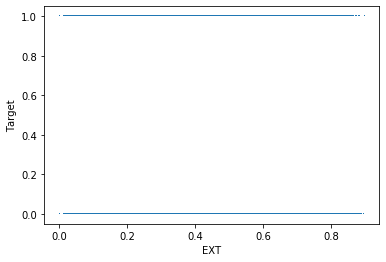

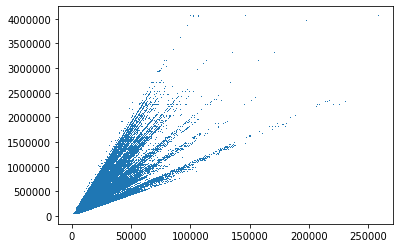

In [87]:
#3
plt.plot(app_train['EXT_SOURCE_3'],app_train['TARGET'],',')
plt.xlabel('EXT')
plt.ylabel('Target')
plt.show()

plt.plot(app_train['AMT_ANNUITY'],app_train['AMT_CREDIT'],',')
plt.show()

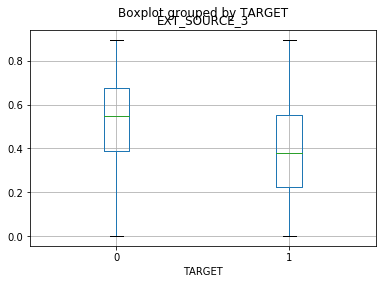

In [91]:
app_train.boxplot(column = 'EXT_SOURCE_3',by = 'TARGET' ) 
plt.show()